# Chapter: Data Preprocessing

# Topic: De-noising Process Signals

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


array([1468.0, 1400.2, 1334.8, ..., 1279.5, 1200.4, 1097.4], dtype=object)

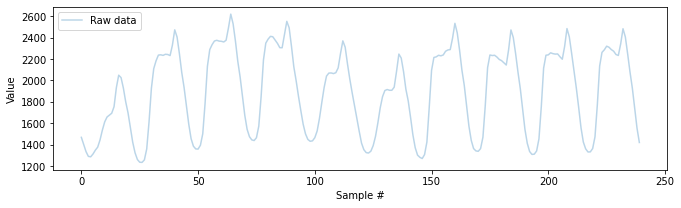

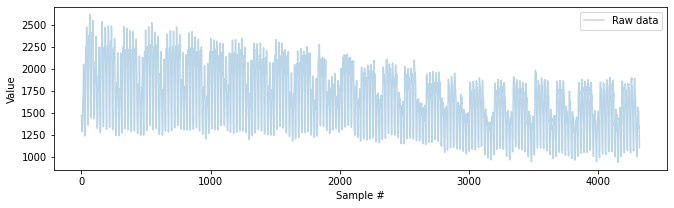

In [12]:
# read data
import numpy as np
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive/')

# %cd "/content/drive/My drive/hanhwa_AA/"

# !git clone https://github.com/SungKu/Hanhwa_AA.git

linkpath = "/content/drive/My Drive/hanhwa_AA/Hanhwa_AA/1_Cleaning_process_data"
dirname = os.getcwd()

data_pth = os.path.join(linkpath,'Load7.csv')

noisy_signal = pd.read_csv(data_pth).values

display(np.array(noisy_signal[:,1]))

import matplotlib.pyplot as plt

plt.figure(figsize=(11,3))
plt.plot(noisy_signal[0:24*10,1], alpha=0.3, label='Raw data')
plt.xlabel('Sample #'), plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(11,3))
plt.plot(noisy_signal[0:24*180,1], alpha=0.3, label='Raw data')
plt.xlabel('Sample #'), plt.ylabel('Value')
plt.legend()
plt.show()

In [30]:
# SMA filter
import pandas as pd

windowSize = 12
smoothed_signal_MA = pd.DataFrame(noisy_signal[:,1]).rolling(windowSize).mean().values


In [31]:
# SG filter
import scipy
from scipy.signal import savgol_filter

smoothed_signal_SG = savgol_filter(noisy_signal[:,1], window_length = 13, polyorder = 2)


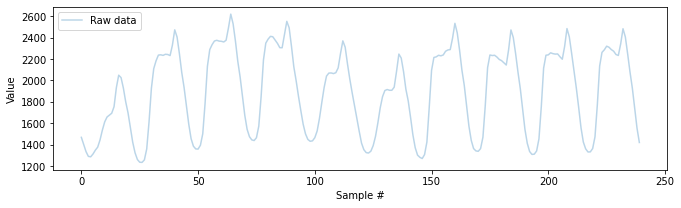

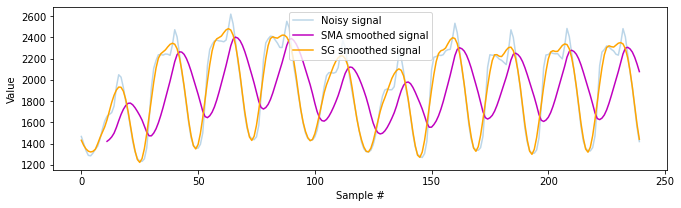

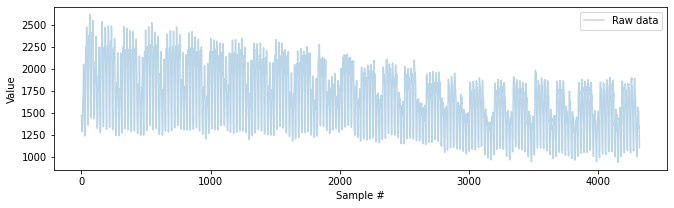

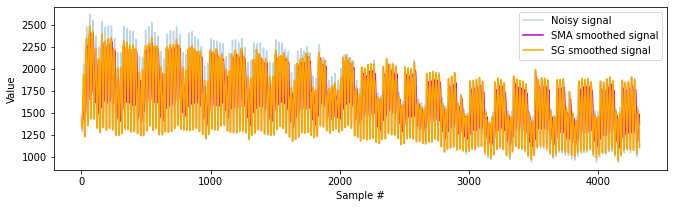

In [33]:
# plots
import matplotlib.pyplot as plt

plt.figure(figsize=(11,3))
plt.plot(noisy_signal[0:24*10,1], alpha=0.3, label='Raw data')
plt.xlabel('Sample #'), plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(11,3))
plt.plot(noisy_signal[0:24*10,1], alpha=0.3, label='Noisy signal')
plt.plot(smoothed_signal_MA[0:24*10,0], color='m', label='SMA smoothed signal')
plt.plot(smoothed_signal_SG[0:24*10], color='orange', label='SG smoothed signal')
plt.xlabel('Sample #'), plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(11,3))
plt.plot(noisy_signal[0:24*180,1], alpha=0.3, label='Raw data')
plt.xlabel('Sample #'), plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(11,3))
plt.plot(noisy_signal[0:24*180,1], alpha=0.3, label='Noisy signal')
plt.plot(smoothed_signal_MA[0:24*180,0], color='m', label='SMA smoothed signal')
plt.plot(smoothed_signal_SG[0:24*180], color='orange', label='SG smoothed signal')
plt.xlabel('Sample #'), plt.ylabel('Value')
plt.legend()
plt.show()